In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../input/train.csv")
original = pd.read_csv("../input/Churn_Modelling.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [6]:
original.dropna(axis=0, inplace=True)
original.to_csv("../input/original_dropped_NAN.csv")

In [7]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [10]:
train.shape

(165034, 14)

In [23]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
original.CustomerId.value_counts()

15628319    2
15682355    2
15667932    1
15766185    1
15667632    1
           ..
15671390    1
15647385    1
15739223    1
15631305    1
15737556    1
Name: CustomerId, Length: 9996, dtype: int64

In [13]:
train.CustomerId.value_counts()[:20]

15682355    121
15570194     99
15585835     98
15595588     91
15648067     90
15793331     90
15585067     86
15782530     85
15809837     84
15806901     84
15756901     83
15686963     83
15697035     83
15589475     82
15641490     81
15657535     80
15605036     79
15798895     79
15690164     78
15594812     76
Name: CustomerId, dtype: int64

In [15]:
train.Surname.value_counts()[:20]

Hsia                2456
T'ien               2282
Hs?                 1611
Kao                 1577
Maclean             1577
Ts'ui               1567
P'eng               1503
H?                  1420
Hsueh               1306
Shih                1251
Ch'ang              1229
Ch'iu               1199
Mazzanti            1192
Tuan                1164
Fanucci             1139
Onyemauchechukwu    1138
Tien                1132
Smith               1129
Nwankwo             1117
Manna               1024
Name: Surname, dtype: int64

In [16]:
train.CreditScore.value_counts()

850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: CreditScore, Length: 457, dtype: int64

In [17]:
train.Geography.value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [20]:
train.Tenure.value_counts()

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

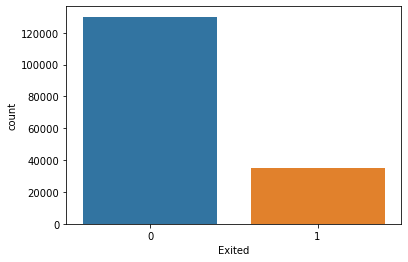

In [18]:
sns.countplot(x='Exited', data=train)
plt.show()

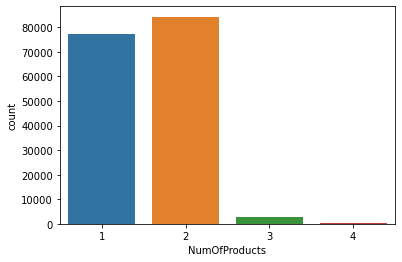

In [19]:
sns.countplot(x='NumOfProducts', data=train)
plt.show()

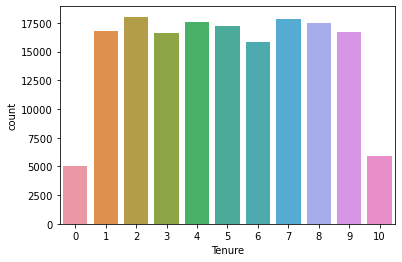

In [15]:
sns.countplot(x='Tenure', data=train)
plt.show()

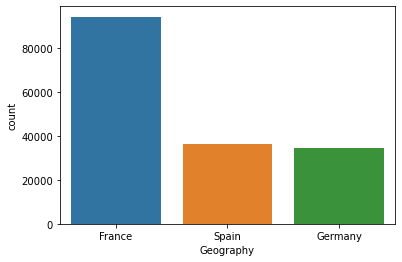

In [16]:
sns.countplot(x='Geography', data=train)
plt.show()

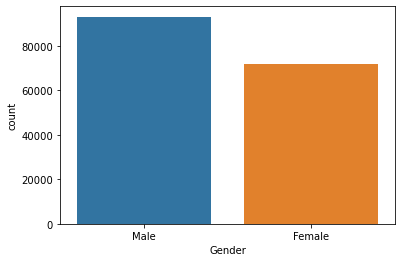

In [17]:
sns.countplot(x='Gender', data=train)
plt.show()

In [27]:
original = original.drop('RowNumber', axis=1).dropna(axis=0, inplace=True)

# concatenate datasets
df = pd.concat([train, original], ignore_index=True)
df = df.drop_duplicates()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [22]:
train[train.CustomerId==15682355].head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
273,273,15682355,Hsueh,727,Germany,Male,35.0,9,140966.55,1,1.0,1.0,179227.21,0
2565,2565,15682355,Tien,744,France,Male,37.0,6,0.00,2,1.0,1.0,137944.16,0
5063,5063,15682355,Niu,790,Spain,Male,44.0,1,128100.75,1,1.0,0.0,164517.96,1
11942,11942,15682355,Hsueh,616,France,Female,43.0,9,95167.82,2,0.0,1.0,132741.56,0
13009,13009,15682355,Manna,652,Spain,Female,33.0,7,0.00,2,1.0,1.0,112333.22,0
15631,15631,15682355,P'an,663,France,Male,60.0,2,155413.08,1,1.0,1.0,54702.66,0
15649,15649,15682355,Chukwubuikem,635,Germany,Male,30.0,9,115115.39,1,1.0,0.0,124902.72,0
16051,16051,15682355,Milano,653,Germany,Female,48.0,3,122552.34,1,0.0,0.0,162719.69,1
16218,16218,15682355,Sabbatini,772,Germany,Male,38.0,7,75075.31,2,1.0,1.0,92888.52,0
18755,18755,15682355,Ts'ai,661,Spain,Male,37.0,3,0.00,2,1.0,1.0,184842.21,0
